Example to demo the functions of the spatial_spins class.

In [1]:
import numpy as np
import math
import sys
import tqdm
import matplotlib.pyplot as plt

from spatial_spin_monte_carlo import spatial_spin_monte_carlo as Spins
from srgg_utils import *

In [2]:
def linear_field( p ) : 
    x,y=p
    gradient = 5.0
    #return abs( 2.0*gradient*x - gradient ) - 1.25
    return 2.0*gradient*x - gradient

def gauss_kernel(x,sigma,gamma,a=1.0) : 
    return a*math.exp( -(x/sigma)**gamma ) 

Sample a Soft RGG with a gaussian connection probability kernel.

/home/matt/Dropbox/PhD/Code/spatial_spin_monte_carlo/example/srgg_utils.py:128: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if positions is not None and positions != 'spectral':
/home/matt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


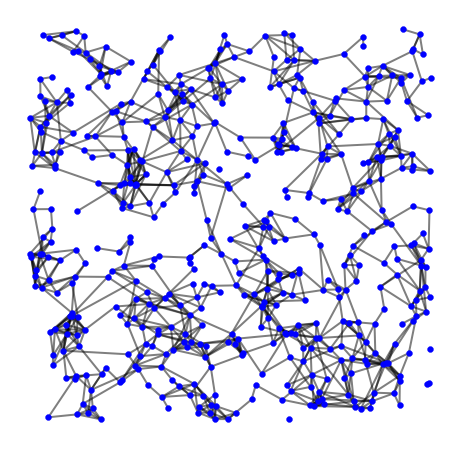

In [3]:
N= 500
d=2
positions = np.random.uniform(0.0,1.0,(N,d) ) 

external_field = True

initial_conditions = list(np.random.choice([-1,1],size=N))

kernel_params =  [ 0.06 , 2.0]

#Make the graph given the node locations and kernel:
graph , Connection_Probabilities = Make_Soft_RGG_Given_Positions(positions, gauss_kernel ,return_connection_probs=True,kernel_params=kernel_params)

plt.figure(1,figsize=(8,8))
network_plot = graph_plot(graph,positions=positions)
#network_plot.node_color = spin_system.node_states
network_plot.edge_transparency = 0.5
network_plot.color_scheme = 'Oranges'
network_plot.node_size = 35
network_plot.edge_width = 2.0
network_plot.node_line_width = 0.4
network_plot.edge_style = 'solid'
network_plot.make_plot()

In [4]:
T = 5000
beta = 0.15

#Initialize_spins: and create class:
spin_system = Spins.spatial_spins(positions,graph)
spin_system.Beta = beta

#Set the external field:
spin_system.node_label_map = spin_system.spatial_node_label_map
spin_system.scalar_field = linear_field

current_states = [ ]
for p in tqdm.tqdm_notebook( range(T) ,miniters=int(float(T)/10.0)) : 
    node_states = spin_system.do_spin_flip()
    current_states.append(float(np.sum(spin_system.node_states))/N)

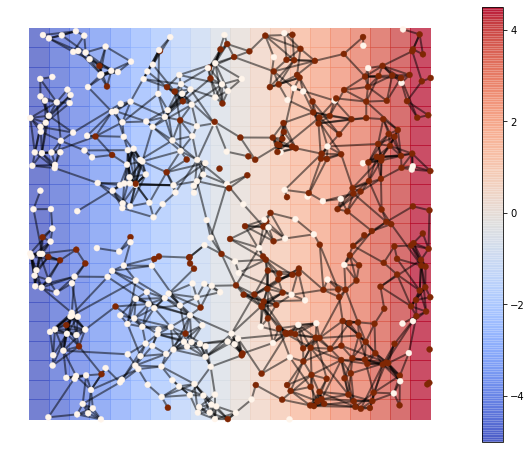

In [5]:
plt.figure(1,figsize=(10,8))
network_plot = graph_plot(graph,positions=positions)
network_plot.node_color = spin_system.node_states
network_plot.edge_transparency = 0.5
network_plot.color_scheme = 'Oranges'
network_plot.node_size = 35
network_plot.edge_width = 2.0
network_plot.node_line_width = 0.4
network_plot.edge_style = 'solid'


#Plotting External field:
if external_field == True : 
    from numpy import linspace, meshgrid
    from matplotlib.pyplot import colorbar, pcolor, show
    x, y = np.arange(0.0, 1.05, 0.05), np.arange(0.0, 1.05, 0.05)
    X, Y = meshgrid(x, y)
    Z = spin_system.scalar_field( (X, Y) )
    pcolor(X, Y, Z,alpha=0.7,cmap="coolwarm")
    colorbar()
network_plot.make_plot()
plt.savefig("Example_spin_state")

# Simulate spin series

In [6]:
T=20000
beta_c = Spins.crit_beta_sparse(graph) 
beta=2.0*beta_c
magnet_series= Spins.sample_magnetization_series(graph, T, beta, positions = None, T_Burn=0, Initial_State=np.ones(len(graph)), control_field=None, sampling_method="Metropolis",take_positive=False)



Computing critical temperature


(-1, 1)

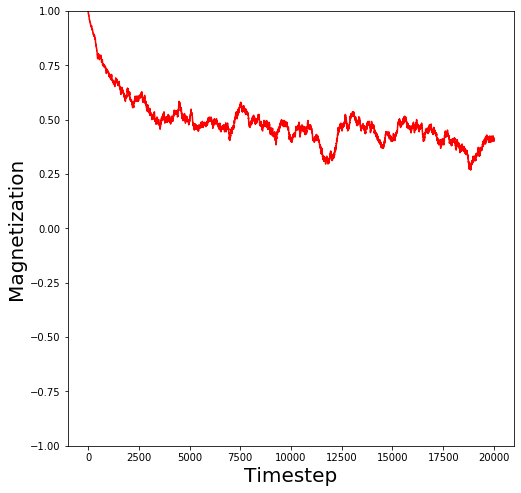

In [7]:
plt.figure(1,figsize=(8,8))
plt.plot(magnet_series,'r')
plt.xlabel("Timestep",fontsize=20)
plt.ylabel("Magnetization",fontsize=20)
plt.ylim(-1,1)